# **Social Network Ads Prediction using SVM**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

> **1. Data Pre-processing :**

In [2]:
df = pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [3]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
df.tail()

,Age,EstimatedSalary,Purchased
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0
399,49,36000,1


In [5]:
X = df.drop('Purchased', axis=1)
Y = df['Purchased']

In [6]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


> **2. Create and Train SVM Model :**

In [7]:
from sklearn.svm import SVC

In [8]:
svm_clf = SVC(kernel='rbf', C=1.0)
svm_clf.fit(x_train, y_train)

SVC()

> **3. Predict Data Set Results :**

In [9]:
y_pred = svm_clf.predict(x_test)

> **4. Evaluate the Model Performance :**

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
score = accuracy_score(y_test, y_pred)
print(score)

0.7375


In [12]:
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[49  3]
 [18 10]]


In [13]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.94      0.82        52
           1       0.77      0.36      0.49        28

    accuracy                           0.74        80
   macro avg       0.75      0.65      0.66        80
weighted avg       0.74      0.74      0.71        80



> **5. Visualize the Result :**

In [14]:
from sklearn.inspection import DecisionBoundaryDisplay

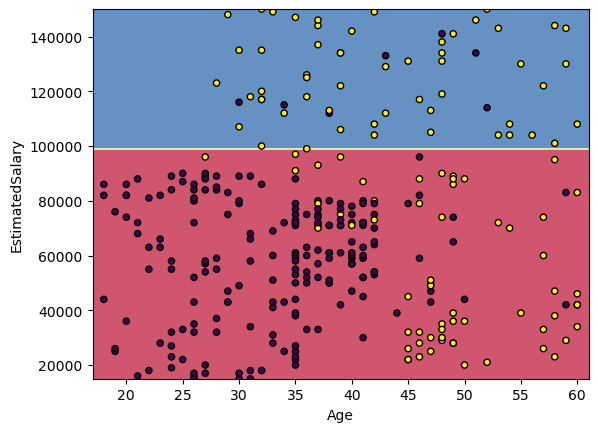

In [15]:
# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
        svm_clf,
        x_train,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel='Age',
        ylabel='EstimatedSalary',
    )
 
# Scatter plot
plt.scatter(x_train['Age'], x_train['EstimatedSalary'],
            c=y_train,
            s=20, edgecolors="k")
plt.show()